# Calculate and Plot the Normalised Difference Vegetation Index (NDVI)
The NDVI is a commonly used index for studying vegetation health and dynamics. NDVI is also helpful for identifying cloud contamination since NDVI values for cloud are much lower than for vegetation. 

The formula for NDVI is

$\text{NDVI} = \frac{\text{NIR}-\text{RED}}{\text{NIR}+\text{RED}}$

where NIR is the Near Infrared band and RED is the Red band. 

In a graphical GIS application such as QGIS, NDVI is typically calculated for each layer using band arithmetic. This can be a time-consuming process for a large time series. Xarray can calculate the NDVI for an entire time series using a single line of code.

## Setup

In [8]:
import xarray as xr
import matplotlib.pyplot as plt # For creating custom plots

## Read the netCDF File

In [2]:
ds = xr.open_dataset('../Data/netCDF/ds_BM_NP.nc')

## Calculate Monthly NDVI
This will calculate the NDVI monthly time series for each pixel in the study area. 

In [3]:
NDVI = (ds.nbart_nir_1 - ds.nbart_red)/(ds.nbart_nir_1 + ds.nbart_red)

You can plot the NDVI for selected dates by putting them in a list `[]` inside the `.sel()` function.

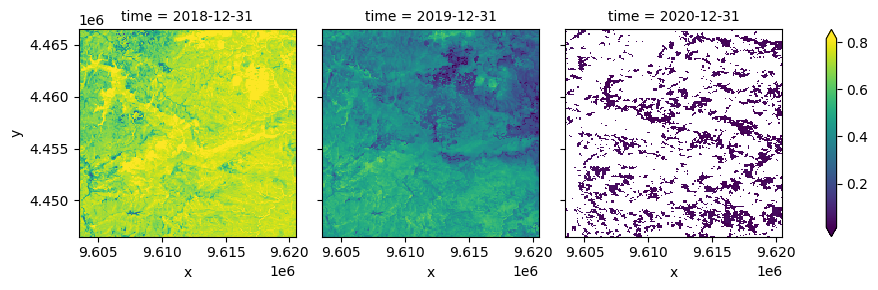

In [12]:
NDVI.sel(time=['2018-12-31','2019-12-31', '2020-12-31']).plot(col='time', cmap='viridis', robust=True)

## Calculate Annual Median NDVI
Resampling can be applied to the monthly NDVI time series to get an annual summary of the NDVI over the study region. Change detection techniques could then be applied to the annual data.

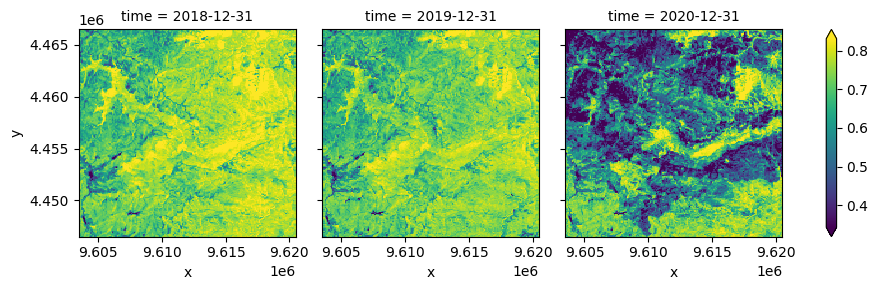

In [13]:
# This will plot the annual NDVI without saving it to a variable.
NDVI.resample(time='Y').median().plot(col='time', cmap='viridis', robust=True)

## Downsample to Square Kilometres and Plot a Pixel Time Series
From the plot above it can be seen that some areas had stable NDVI over the 3-year period, whereas others were more unstable. Plotting the 1D time series for a sample of the pixels might be informative in this case. In the following example the data is downsampled to years with 1000m spatial resolution. See [Resampling Along the Time Dimension](Resampling_Along_the_Time_Dimension.ipynb) and [Resampling Along the Spatial Dimensions](Resampling_Along_the_Spatial_Dimensions.ipynb) for further details.

In [4]:
NDVI_sqkm = (NDVI.resample(time='Y')
               .median()
               .coarsen(x=10, y=10)
               .mean()
              )
NDVI_sqkm

<xarray.DataArray (time: 3, y: 20, x: 17)>
array([[[0.63834125, 0.6504201 , 0.66636354, ..., 0.8302049 ,
         0.7993955 , 0.780542  ],
        [0.64943147, 0.6627059 , 0.6736879 , ..., 0.7853911 ,
         0.77332664, 0.73894715],
        [0.63003474, 0.66520345, 0.64824617, ..., 0.7748577 ,
         0.7575567 , 0.7499177 ],
        ...,
        [0.7011117 , 0.7119534 , 0.72465795, ..., 0.8045066 ,
         0.77903074, 0.77937096],
        [0.6134578 , 0.7018068 , 0.7286154 , ..., 0.7726678 ,
         0.7757267 , 0.774328  ],
        [0.6779216 , 0.6883615 , 0.6903404 , ..., 0.7740371 ,
         0.7511697 , 0.76640505]],

       [[0.62309635, 0.6365166 , 0.66898054, ..., 0.7942917 ,
         0.7597793 , 0.75656664],
        [0.6290853 , 0.6505579 , 0.6646123 , ..., 0.74691826,
         0.74892974, 0.70939136],
        [0.6194919 , 0.65586007, 0.6310171 , ..., 0.75188524,
         0.7369433 , 0.7335315 ],
...
        [0.6840961 , 0.70010394, 0.72022766, ..., 0.745906  ,
         0.6895376 , 0.74194914],
        [0.6167032 , 0.7079088 , 0.71933526, ..., 0.7019501 ,
         0.7389652 , 0.75684065],
        [0.65553933, 0.6817569 , 0.68758035, ..., 0.70836973,
         0.69202197, 0.6725443 ]],

       [[0.30234164, 0.40351722, 0.51257825, ..., 0.60358214,
         0.6279844 , 0.63517904],
        [0.37324882, 0.38954553, 0.38195908, ..., 0.5117934 ,
         0.49120763, 0.48241162],
        [0.45248225, 0.5424099 , 0.45693958, ..., 0.50187296,
         0.5198744 , 0.69319665],
        ...,
        [0.71076286, 0.7183434 , 0.73611987, ..., 0.68298095,
         0.7142784 , 0.74773264],
        [0.63622576, 0.723005  , 0.7330447 , ..., 0.7389433 ,
         0.74968386, 0.7589737 ],
        [0.6879074 , 0.7106838 , 0.70670897, ..., 0.7483602 ,
         0.7265164 , 0.7389897 ]]], dtype=float32)
Coordinates:
  * y            (y) float64 4.466e+06 4.465e+06 ... 4.448e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.605e+06 ... 9.619e+06 9.62e+06
    spatial_ref  int32 3308
  * time         (time) datetime64[ns] 2018-12-31 2019-12-31 2020-12-31

Now create a spatial plot of the downsampled dataset and choose some pixels to investigate.

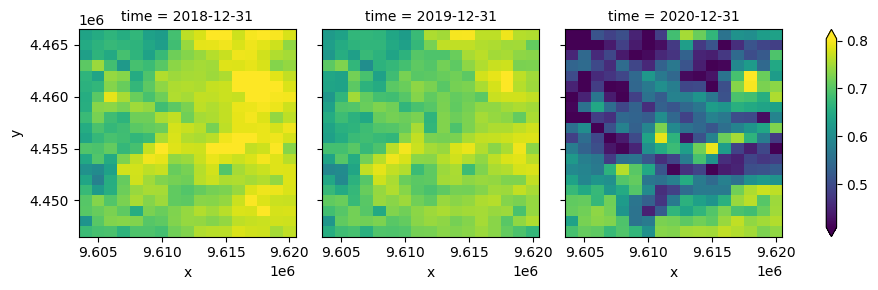

In [5]:
NDVI_sqkm.plot(col='time', cmap='viridis', robust=True)

From here, using Matplotlib techniques, it is possible to plot the individual time series on one set of axes. The `label` parameter is used for the legend entries. `.sel()` is used to select pixels by their coordinates.

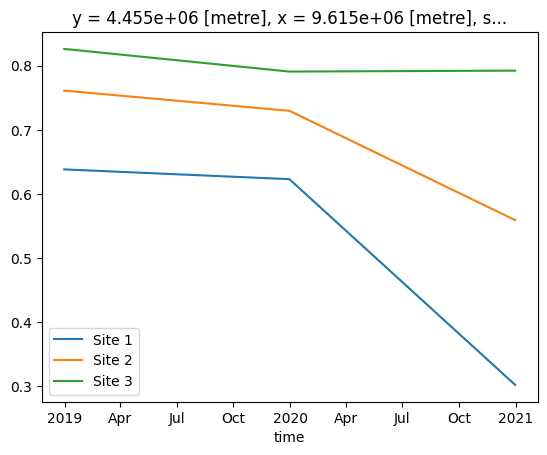

In [51]:
fig, ax = plt.subplots()
NDVI_sqkm.sel(x=9604000, y=4466000).plot(ax=ax, label='Site 1')
NDVI_sqkm.sel(x=9613000, y=4457000).plot(ax=ax, label='Site 2')
NDVI_sqkm.sel(x=9615000, y=4455000).plot(ax=ax, label='Site 3')
ax.legend()

## Further Reading
* See the [Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html) tutorials for help getting started with Matplotlib.